In [ ]:
from keras.datasets import cifar10

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D
from keras.layers.core import Flatten
from tensorflow.keras.optimizers import SGD
from keras.callbacks import TensorBoard
cb=TensorBoard()

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


<function matplotlib.pyplot.show>

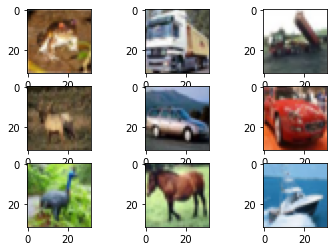

In [ ]:
for i in range(9):
  plt.subplot(330 + i + 1)
  plt.imshow(X_train[i])
plt.show

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same', input_shape = (32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding= 'same', input_shape = (32, 32, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(Conv2D(64, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(Conv2D(128, (3, 3), activation = 'relu', kernel_initializer='he_uniform', padding = 'same'))
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

In [ ]:

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_callback=model.fit(X_train,y_train,batch_size=64,epochs=30,validation_data=(X_test,y_test),callbacks=cb)

Epoch 1/30
782/782 [==============================] - 320s 408ms/step - loss: 1.6651 - accuracy: 0.3800 - val_loss: 1.4233 - val_accuracy: 0.5067
Epoch 2/30
782/782 [==============================] - 309s 395ms/step - loss: 1.2104 - accuracy: 0.5645 - val_loss: 1.0478 - val_accuracy: 0.6228
Epoch 3/30
782/782 [==============================] - 312s 399ms/step - loss: 0.9921 - accuracy: 0.6499 - val_loss: 0.8840 - val_accuracy: 0.6897
Epoch 4/30
782/782 [==============================] - 301s 385ms/step - loss: 0.8693 - accuracy: 0.6967 - val_loss: 0.7999 - val_accuracy: 0.7221
Epoch 5/30
782/782 [==============================] - 309s 395ms/step - loss: 0.7848 - accuracy: 0.7259 - val_loss: 0.7307 - val_accuracy: 0.7470
Epoch 6/30
782/782 [==============================] - 310s 396ms/step - loss: 0.7286 - accuracy: 0.7465 - val_loss: 0.6994 - val_accuracy: 0.7600
Epoch 7/30
782/782 [==============================] - 308s 394ms/step - loss: 0.6771 - accuracy: 0.7634 - val_loss: 0.7297 -

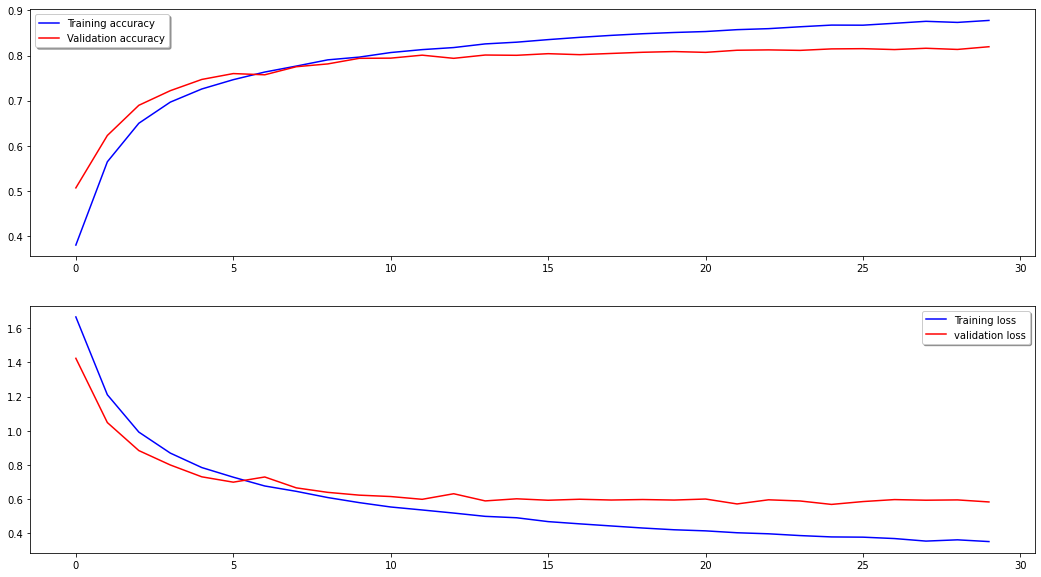

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[1].plot(history_callback.history['loss'], color='b', label="Training loss")
ax[1].plot(history_callback.history['val_loss'], color='r', label="validation loss",axes =ax[1])
legend = ax[1].legend(loc='best', shadow=True)

ax[0].plot(history_callback.history['accuracy'], color='b', label="Training accuracy")
ax[0].plot(history_callback.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

In [ ]:
score = model.evaluate(X_test, y_test, verbose = 1)

313/313 [==============================] - 17s 56ms/step - loss: 0.5838 - accuracy: 0.8195


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred, target_names= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]))

              precision    recall  f1-score   support

    airplane       0.81      0.87      0.84      1000
  automobile       0.93      0.90      0.91      1000
        bird       0.82      0.68      0.74      1000
         cat       0.67      0.66      0.66      1000
        deer       0.80      0.80      0.80      1000
         dog       0.72      0.76      0.74      1000
        frog       0.84      0.88      0.86      1000
       horse       0.84      0.90      0.87      1000
        ship       0.94      0.83      0.88      1000
       truck       0.85      0.93      0.89      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



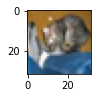

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


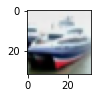

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


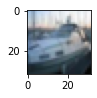

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


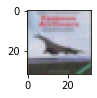

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


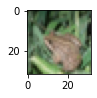

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


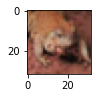

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


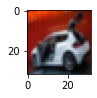

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


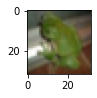

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


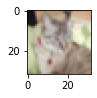

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
import numpy as np
for i in range(9):
  plt.subplot(330 + i +1)
  plt.imshow(X_test[i])
  plt.show()  
  print(np.round(y_pred[i]))